<a href="https://colab.research.google.com/github/lucyduan/mdst/blob/master/Copy_of_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# STATS 306, Winter 2022
## Take-home Final Exam

Assigned: April 14, 2022  
Due: April 21, 2022, 11:59 pm Ann Arbor time

There are a total of **four problems** for a total of **40 points**. Each problem is worth **10 points**.

**PLEASE READ EXAM INSTRUCTIONS** (available [here](https://github.com/ambujtewari/stats306-winter2022/blob/main/final/README.md)) before proceeding further.


### Required Packages

In [ ]:
library(tidyverse)

In [ ]:
# DO NOT EDIT THIS CELL
data_prefix = "https://github.com/ambujtewari/stats306-winter2022/raw/main/data/"

### Statement of Academic Integrity

**(1)**  

_"I have read the exam instructions. All work submitted is my own. If I used any resources, physical, digital, or otherwise, I have listed them below. I have fully complied with all standards of academic integrity."_  

Type your full name below in lieu of a physical signature.

#### Text solution cell 0.1
Lucy Duan

**(2)** List any resources you used that are not mentioned in the exam instructions

#### Text solution cell 0.2

NA

### Problem 1

#### Stars, _10 points_

Physical properties of selected stars, including luminosity, temperature, and spectral class.

- `star` Name of star.
- `magnitude` Absolute magnitude of the star, which is a function of the star’s luminosity and
distance to the star.
- `temp` Surface temperature in degrees Kelvin (K).
- `type` Spectral class of star in the OBAFGKM system.

In [ ]:
# DO NOT EDIT THIS CELL

stars <- readRDS(url(str_c(data_prefix, "stars.rds")))
head(stars)

star,magnitude,temp,type
<fct>,<dbl>,<int>,<chr>
Sun,4.8,5840,G
SiriusA,1.4,9620,A
Canopus,-3.1,7400,F
Arcturus,-0.4,4590,K
AlphaCentauriA,4.3,5840,G
Vega,0.5,9900,A


**(1)** Convert the type of column `star` to character and assign the resulting tibble back to the variable `stars`. _2 points_

In [ ]:
# SOLUTION CELL 1.1
stars <- stars %>%
         mutate(star = as.character(star))

**(2)** Create a scatter plot with `magnitude` on the x-axis and `temp` on the y-axis with stars of different types in different colors. Superimpose a single smooth curve on your scatterplot to visualize the relationship between `magnitude` and `temperature`. Do **NOT** display standard errors. _2 points_

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



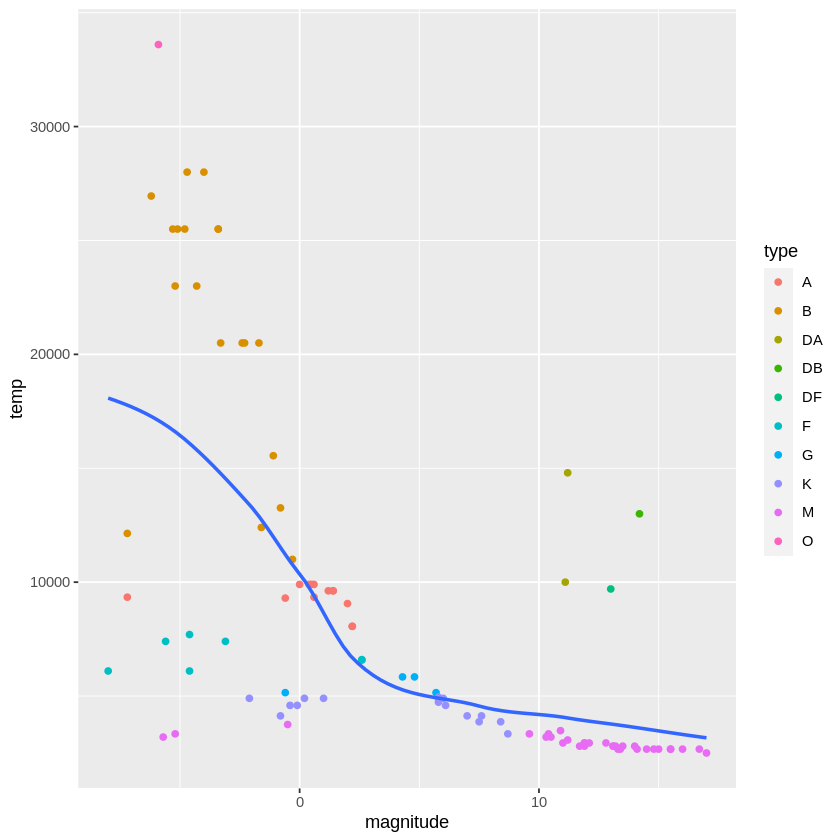

In [ ]:
# SOLUTION CELL 1.2
ggplot(stars, aes(x = magnitude, y = temp)) +
      geom_point(aes(color = type)) + 
      geom_smooth(se=FALSE)


**(3)** Perform the following steps, in order, using pipes:

- Keep only those rows where the name of the star begins with `*` followed by one or more letters (both uppercase letters A-Z and lowercase letters a-z are allowed).
- Create a new column `new_star` with the `*` at the beginning of the star's name removed.

To get full credit, please make sure that the resulting tibble is fully visible. _4 points_

In [ ]:
# SOLUTION CELL 1.3
stars_keep = "^\\*[A-Za-z]{1,}"
stars_2 <- stars %>%
        filter(str_detect(star, stars_keep)) %>%
        mutate(new_star = str_replace(star, "^//*", ""))
stars_2



star,magnitude,temp,type,new_star
<chr>,<dbl>,<int>,<chr>,<chr>
*ProximaCentauri,15.5,2670,M,*ProximaCentauri
*AlphaCentauriB,5.8,4900,K,*AlphaCentauriB
*L726-8,15.5,2670,M,*L726-8
*UVCeti,16.0,2670,M,*UVCeti
*SiriusA,1.4,9620,A,*SiriusA
*SiriusB,11.2,14800,DA,*SiriusB
*GXAndromedae,10.4,3340,M,*GXAndromedae
*GQAndromedae,13.4,2670,M,*GQAndromedae
*Struve2398A,11.2,3070,M,*Struve2398A


**(4)** Make the plot shown [here](https://github.com/ambujtewari/stats306-winter2022/raw/main/data/plot_1-4.jpeg). Don't worry about matching the size and proportions of the example plot. Please make sure to turn off any legend that might appear using the `show.legend` argument. _2 points_



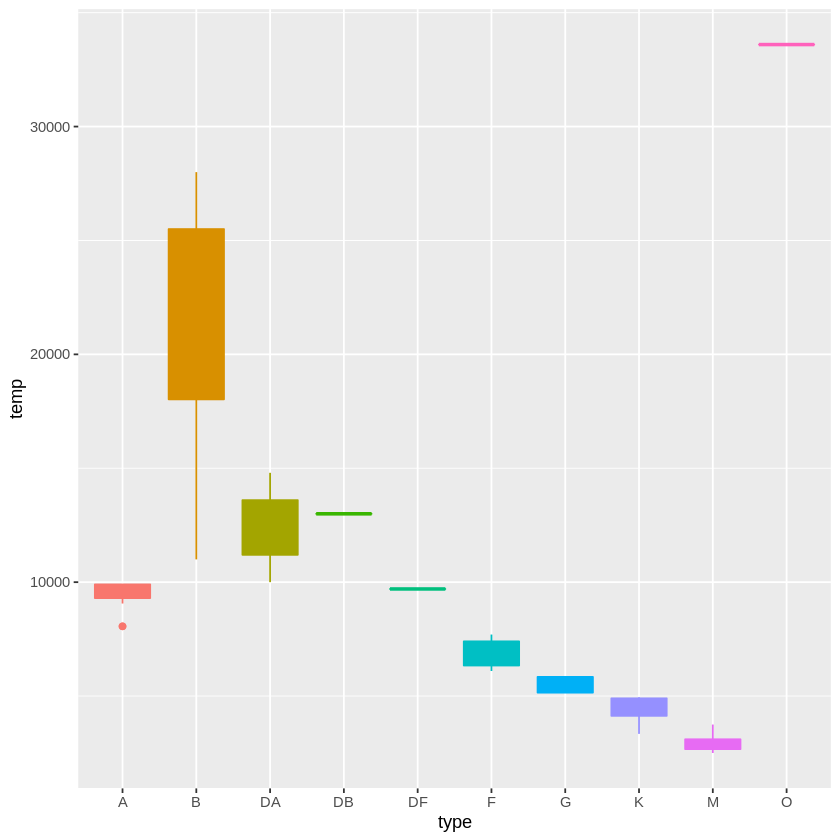

In [ ]:
# SOLUTION CELL 1.4
ggplot(stars, aes(x = type, y = temp)) +
      geom_boxplot(aes(color = type, fill = type), show.legend = FALSE)


### Problem 2

#### Movies, _10 points_

A data set from the MovieLens recommender system.

- `movieId` Unique ID for the movie.
- `title` Movie title (not unique).
- `year` Year the movie was released.
- `genres` Genres associated with the movie.
- `userId` Unique ID for the user.
- `rating` A rating between 0 and 5 for the movie.
- `timestamp` Date and time the rating was given (in seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970).

In [ ]:
# DO NOT EDIT THIS CELL

movielens <- read_csv(str_c(data_prefix, "movielens.csv"), col_types = "icicidi")
head(movielens)

movieId,title,year,genres,userId,rating,timestamp
<int>,<chr>,<int>,<chr>,<int>,<dbl>,<int>
31,Dangerous Minds,1995,Drama,1,2.5,1260759144
1029,Dumbo,1941,Animation|Children|Drama|Musical,1,3.0,1260759179
1061,Sleepers,1996,Thriller,1,3.0,1260759182
1129,Escape from New York,1981,Action|Adventure|Sci-Fi|Thriller,1,2.0,1260759185
1172,Cinema Paradiso (Nuovo cinema Paradiso),1989,Drama,1,4.0,1260759205
1263,"Deer Hunter, The",1978,Drama|War,1,2.0,1260759151


Be very careful **not** to use the movie title to uniquely identify movies in this problem. The title *does not* pin the movie down uniquely. For example, the movie with title `"Alice in Wonderland"` has been made several times over the years.

In [ ]:
# DO NOT EDIT THIS CELL

movielens %>%
    filter(title == "Alice in Wonderland") %>%
    pull(year) %>%
    unique()

[1] 1951 2010 1933

**(1)** Use a single piped command to output a tibble that has all movies with at least 200 ratings and a mean rating strictly greater than 4.25 sorted in descending order by mean rating. This tibble should have 4 columns:

- `movieId` Unique ID for the movie.
- `title` Same title can have multiple IDs but there is going to be a unique title for a given ID.
- `mean_rating` mean rating for the movie.
- `num_ratings` the number of ratings for this movie in the data set.

_2 points_

In [ ]:
# SOLUTION CELL 2.1
movielens %>% 
      group_by(movieId, title) %>%
      summarise(num_ratings = n(), mean_rating = mean(rating)) %>%
      filter(num_ratings >= 200, mean_rating > 4.25) %>%
      arrange(desc(mean_rating))
  

`summarise()` has grouped output by 'movieId'. You can override using the
`.groups` argument.


movieId,title,num_ratings,mean_rating
<int>,<chr>,<int>,<dbl>
858,"Godfather, The",200,4.487500
318,"Shawshank Redemption, The",311,4.487138
50,"Usual Suspects, The",201,4.370647
527,Schindler's List,244,4.303279
608,Fargo,224,4.256696
296,Pulp Fiction,324,4.256173


**(2)** Note that the `genres` column of `movielens` has genres separated by vertical bars. For example, `"Drama|War"` means that the movie belongs to Drama and War genres. Write a function `get_single_genres` such that when it is given a character vector with genres as input, it outputs a longer character vector where each genre has been separated out and one entry of the vector just has a single genre. The order in which the genres appear in the input should be preserved. Two test cases for your function are given below. You might find it helpful to note that the function `unlist()` can be used to convert a list into a vector. _2 points_

```
> print(get_single_genres(c("Drama",
                    "Animation|Children|Drama|Musical",
                    "Thriller",
                    "Action|Adventure|Sci-Fi|Thriller",
                    "Drama")))
[1] "Drama"     "Animation" "Children"  "Drama"     "Musical"   "Thriller" 
[7] "Action"    "Adventure" "Sci-Fi"    "Thriller"  "Drama"

> print(get_single_genres(c("Drama|War",
                          "Action|Adventure|Drama",
                          "Drama",
                          "Fantasy|Horror|Romance|Thriller",
                          "Thriller")))
[1] "Drama"     "War"       "Action"    "Adventure" "Drama"     "Drama"    
[7] "Fantasy"   "Horror"    "Romance"   "Thriller"  "Thriller" 
```

In [ ]:
# SOLUTION CELL 2.2
get_single_genres <- function(x){
  vec <- list()
  for(i in x){
    if(str_detect(i, "\\|")){
      split = str_split(i, "\\|")
      vec <- c(vec, split)

    }
    else{
    vec <- c(vec, i)
    }
  }
  unlist(vec)
}


In [ ]:
# DO NOT EDIT THIS CELL

print(get_single_genres(c("Drama",
                    "Animation|Children|Drama|Musical",
                    "Thriller",
                    "Action|Adventure|Sci-Fi|Thriller",
                    "Drama")))

 [1] "Drama"     "Animation" "Children"  "Drama"     "Musical"   "Thriller" 
 [7] "Action"    "Adventure" "Sci-Fi"    "Thriller"  "Drama"    


In [ ]:
# DO NOT EDIT THIS CELL

print(get_single_genres(c("Drama|War",
                          "Action|Adventure|Drama",
                          "Drama",
                          "Fantasy|Horror|Romance|Thriller",
                          "Thriller")))

 [1] "Drama"     "War"       "Action"    "Adventure" "Drama"     "Drama"    
 [7] "Fantasy"   "Horror"    "Romance"   "Thriller"  "Thriller" 


**(3)** Create a vector `all_genres` by calling the function `get_single_genres` on the `genres` column of the `movielens` tibble. _2 points_

In [ ]:
# SOLUTION CELL 2.3
all_genres <- vector()
all_genres <- get_single_genres(movielens$genres)


In [ ]:
# DO NOT EDIT THIS CELL

length(all_genres) # should print 265517
length(unique(all_genres)) # should print 20

[1] 265517

[1] 20

**(4)** Create a tibble `genre_tbl` that has a single column named `genre`. This column should be identical to the character vector `all_genres` you created above. _1 point_

In [ ]:
# SOLUTION CELL 2.4
genre_tbl <- tibble(genre = all_genres)


In [ ]:
# DO NOT EDIT THIS CELL

head(genre_tbl) # print first few rows of genre_tbl
nrow(genre_tbl) # should print 265517

genre
<chr>
Drama
Animation
Children
Drama
Musical
Thriller


[1] 265517

**(5)** Use the `genre_tbl` tibble to output a tibble with five rows and two columns named `genre` and `count`. The `genre` column should be the top 5 most frequent genres in `genre_tbl` sorted in descending order of their frequencies. The `count` column should be the count of how frequently the genre appears in `genre_tbl`. _3 points_

In [ ]:
# SOLUTION CELL 2.5
tibble <- genre_tbl %>%
    group_by(genre) %>%
    summarise(count = n()) %>%
    arrange(desc(count)) %>%
    slice(1:5)

tibble
  

genre,count
<chr>,<int>
Drama,44752
Comedy,38026
Action,27056
Thriller,25240
Adventure,22017


### Problem 3

#### Test Scores, _10 points_

Distribution of scores for algebra, global history, biology, English, and U.S. history exams.

- `score` Test score from 0 to 100.
- `integrated_algebra` Score frequency on Algebra exam.
- `global_history` Score frequency on global history exam.
- `living_environment` Score frequency on biology exam.
- `english` Score frequency on English exam.
- `us_history` Score frequency on U.S. history exam.

In [ ]:
# DO NOT EDIT THIS CELL

scores <- read_csv(str_c(data_prefix, "scores.csv"), col_types="iiiiii")
head(scores)

**(1)** Using the appropriate pivoting function, create a tibble `pivoted_scores` that should have three columns: `score`, `subject` and `frequency`. The values appearing in `subject` columns should be `"integrated_algebra"`, `"global_history"`, `"living_environment"`, `"english"`, and `"us_history"`. For the `score` and `subject` in a given row, the corresponding entry in `frequency` column should be the frequency of that score in the subject. _2 points_ 

In [ ]:
# SOLUTION CELL 3.1
pivoted_scores <- scores %>%
                  pivot_longer(cols = -c(score), names_to = 'subject', 
                  values_to = 'frequency')

In [ ]:
# DO NOT EDIT THIS CELL

head(pivoted_scores)

**(2)** Using the `if_else()` function (and not using any loops), change the `frequency` column of `pivoted_scores` so that all missing values in that column are converted to 0. Assign the resulting tibble to the variable `no_na_frequency`. _2 points_

In [ ]:
# SOLUTION CELL 3.2
no_na_frequency <- pivoted_scores %>%
                  mutate(no_na_frequency = if_else(is.na(frequency), 0, as.double(frequency)))

In [ ]:
# DO NOT EDIT THIS CELL

filter(no_na_frequency, is.na(frequency))
head(no_na_frequency)

**(3)** Starting with the tibble `no_na_frequency` you created above and using a single piped command, execute the following steps in order:

- Keep only those rows where `score` is not missing.
- Create a tibble with just two columns: `score` and `overall_frequency` where the latter is the sum of the frequencies of a given score across all subjects.
- Create a bar chart as shown [here](https://github.com/ambujtewari/stats306-winter2022/raw/main/data/plot_3-3.jpeg). Note that the bars should be filled with the color named `"tan3"`. Don't worry about matching the size and proportions of the example plot.
- The minimum passing score for these exams is 65. You will notice a spike right at the minimum passing score. Make sure to add a dashed vertical line using  `geom_vline()` at the score of 65 to clearly show the location of the minimum passing score in your plot.

_6 points_



In [ ]:
# SOLUTION CELL 3.3
no_na_frequency %>%
      filter(!is.na(score)) %>%
      group_by(score) %>%
      summarise(overall_frequency = sum(frequency)) %>%
      ggplot(aes(x = score, y = overall_frequency)) + 
      geom_col(fill = 'tan3') + geom_vline(xintercept = 65, linetype = "dashed")



### Problem 4

#### Heights, _10 points_

Students were asked to report their height (in inches) and sex in an online form.

- `time_stamp` Time and date of the entry.
- `sex` Sex of the student.
- `height` Height as reported by student by filling in a text free box.

Note that students were _asked_ to report their heights in inches but not all of them followed that instruction.

In [ ]:
# DO NOT EDIT THIS CELL

heights <- read_csv(str_c(data_prefix, "heights.csv"), col_types = "Tcc")
head(heights)

time_stamp,sex,height
<dttm>,<chr>,<chr>
2014-09-02 13:40:36,Male,75
2014-09-02 13:46:59,Male,70
2014-09-02 13:59:20,Male,68
2014-09-02 14:51:53,Male,74
2014-09-02 15:16:15,Male,61
2014-09-02 15:16:16,Female,65


**(1)** After reading the csv file, the `height` column in `heights` is of type character. Add a new column `new_height` which is the `height` column converted to type double. Assign this new tibble to the variable `heights`. _2 points_

In [ ]:
# SOLUTION CELL 4.1
heights <- heights %>%
           mutate(new_height = as.double(height))

You will see a warning saying that NAs were introduced by coercion. That's OK. The issue is that not all values in `heights` are convertible to type double. Let us look at some of them.

In [ ]:
# DO NOT EDIT THIS CELL

heights %>%
    filter(is.na(new_height)) %>%
    head()

**(2)** First, store all rows of `heights` that don't have `new_height` missing in a variable called `heights_noprob`. Next, using `heights_noprob` create a histogram of `new_height` with a `binwidth` of 100 and fill color `"cornflowerblue"`. _2 points_

In [ ]:
# SOLUTION CELL 4.2
heights_noprob <- heights %>%
                  filter(!is.na(new_height))

ggplot(data = heights_noprob, aes(x = new_height)) + 
geom_histogram(binwidth = 100, fill = "cornflowerblue")


      

You should notice many outliers in the histogram above. Even if people are reporting their heights in centimeters, we should not expect to see values above, say, 214 (7 feet is 213.36 cm).

**(3)** Let us zoom into some of the outliers.

In [ ]:
# DO NOT EDIT THIS CELL

filter(heights_noprob, new_height > 214)

Replot the histogram of `new_height` in `heights_noprob` this time _excluding_ the outliers we found above. Use the same fill color as in the previous histogram but now use a `binwidth` of 10.

_2 points_

In [ ]:
# SOLUTION CELL 4.3
heights_noprob <- heights_noprob %>%
                  filter(new_height <= 214)
ggplot(heights_noprob, aes(x = new_height)) +
          geom_histogram(binwidth = 10, color = "cornflowerblue", 
          fill = "cornflowerblue")


You should see three clear clusters of reported heights. A reasonable conjecture might be that some people reported their height in feet, some in inches, and some in centimeters. Also note that the biggest cluster corresponds to heights reported in inches since that was what the instructions asked students to report.

**(4)** Create a tibble named `heights_prob` that should have those rows of `heights` where `new_height` is missing. _1 point_

In [ ]:
# SOLUTION CELL 4.4
heights_prob <- heights %>%
                  filter(is.na(new_height))

In [ ]:
# DO NOT EDIT THIS CELL

head(heights_prob)


time_stamp,sex,height,new_height
<dttm>,<chr>,<chr>,<dbl>
2014-09-02 15:16:28,Male,"5' 4""",NA
2014-09-02 15:16:37,Female,165cm,NA
2014-09-02 15:16:52,Male,5'7,NA
2014-09-02 15:16:56,Male,>9000,NA
2014-09-02 15:16:56,Male,"5'7""",NA
2014-09-02 15:17:09,Female,"5'3""",NA


**(5)** Create a tibble named `heights_quote` that contains those rows of `heights_prob` where `height` has the height reported in the form `x'y''` or several of its variants like `x'y`, `x'y"` etc. In your solution, separately define a regular expression named `heights_quote_re` that matches only those strings that _entirely consist of_ the following pattern:

- the pattern begins with a single digit
- followed by a single quote `'`
- followed by zero or more occurrences of space (no need to worry about tabs, newlines, etc., just regular space character)
- followed by 0-2 occurences of digits (since the inches parts can be up to 2 digits long)
- followed by an optional decimal part of the inches. The decimal part is a period `.` followed by 1 or 2 digits. 
- followed by an optional ending pattern. The optional ending pattern is either two single quotes `''` or a double quote `"`.

_3 points_

In [ ]:
# SOLUTION CELL 4.5
heights_quote_re = "^\\d{1}'{1}\\s{0,}\\d{0,2}(.(1[0-9]|2[0-9])){0,1}(''|\")"
heights_quote <- heights_prob %>%
                filter(str_detect(height, heights_quote_re))

In [ ]:
# DO NOT EDIT THIS CELL

head(heights_quote)

time_stamp,sex,height,new_height
<dttm>,<chr>,<chr>,<dbl>
2014-09-02 15:16:28,Male,"5' 4""",NA
2014-09-02 15:16:56,Male,"5'7""",NA
2014-09-02 15:17:09,Female,"5'3""",NA
2014-09-04 00:46:45,Male,5'9'',NA
2014-09-04 10:29:44,Male,5'10'',NA
2014-10-19 13:08:30,Male,"5'5""",NA
